## MGRSPandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://vgridpandas.gishub.vn/lab/index.html?path=notebooks/10_mgrs.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

### Install vgridpandas

In [1]:
# %pip install vgridpandas

### Latlong to MGRS

In [2]:
import pandas as pd
from vgridpandas import mgrspandas
df = pd.DataFrame({'lat': [10.775299665325505, 10.78731693], 'lon':[106.70647975040788,107.99626405]})
resolution = 1
df = df.mgrs.latlon2mgrs(resolution)
df

,lat,lon
mgrs_01,,
48PXS89,10.775300,106.706480
48PZS29,10.787317,107.996264


### MGRS to geo boundary

In [4]:
df = df.mgrs.mgrs2geo()
df

,lat,lon,geometry
mgrs_01,,,
48PXS89,10.775300,106.706480,"POLYGON ((106.64616 10.76067, 106.73811 10.760..."
48PZS29,10.787317,107.996264,"POLYGON ((107.92561 10.75125, 108.01785 10.751..."


### MGRS point binning

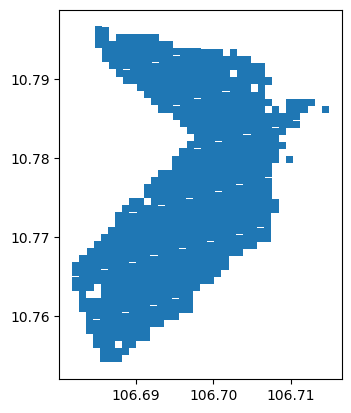

In [6]:
import pandas as pd
import geopandas as gpd

resolution = 3
# df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
df.head()
stats = "count"
df_bin = df.mgrs.mgrsbin(resolution=resolution, stats = stats, return_geometry=True)
df_bin.plot()
df_bin.to_file(f"dist1_pois_mgrs_{resolution}.geojson", driver="GeoJSON")